In [76]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
## Import Data

iris = pd.read_csv('data/iris.csv',index_col='Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
## Check for NA, none found so no work needed to clean data

iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [79]:
## Separate Species into array as dependent variable

species = np.array(iris.Species)
species.shape

(150,)

In [80]:
## Remove species from rest of dataset

iris.drop(['Species'], axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [81]:
## Train model with 70% Training, 30% Testing: (105, 4) (45, 4) (105,) (45,)
## Train model with 60% Training, 40% Testing: (90, 4) (60, 4) (90,) (60,)
## Train model with 50% Training 50% Testing: (75, 4) (75, 4) (75,) (75,)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris, species, test_size=0.4, random_state=50, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


In [82]:
## Use Standard Scaler

from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


In [83]:
## Train KNN Model

from sklearn.neighbors import KNeighborsClassifier

# Create the knn model
k = 2
knn = KNeighborsClassifier(n_neighbors = k)

# Fit on training data
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

In [84]:
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print("KNN Classifier's accuracy with K=", str(k), "is:", str(acc_knn))


## with 70% Training
## KNN Classifier's accuracy with K= 3 is: 95.56
## KNN Classifier's accuracy with K= 2 is: 95.56
## KNN Classifier's accuracy with K= 1 is: 91.11

## With 60% Training
## KNN Classifier's accuracy with K= 1 is: 93.33
## KNN Classifier's accuracy with K= 2 is: 98.33 Best Accuracy Manhattan: 95.0  Chebyshev: 93.33 Euclidean: 98.33
## KNN Classifier's accuracy with K= 3 is: 95.0

## with 50% Training
## KNN Classifier's accuracy with K= 1 is: 96.0
## KNN Classifier's accuracy with K= 2 is: 97.33
## KNN Classifier's accuracy with K= 3 is: 97.33


KNN Classifier's accuracy with K= 2 is: 98.33


Confusion matrix
[[21  0  0]
 [ 0 21  0]
 [ 0  1 17]]

----
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.05555556 0.94444444]]

----


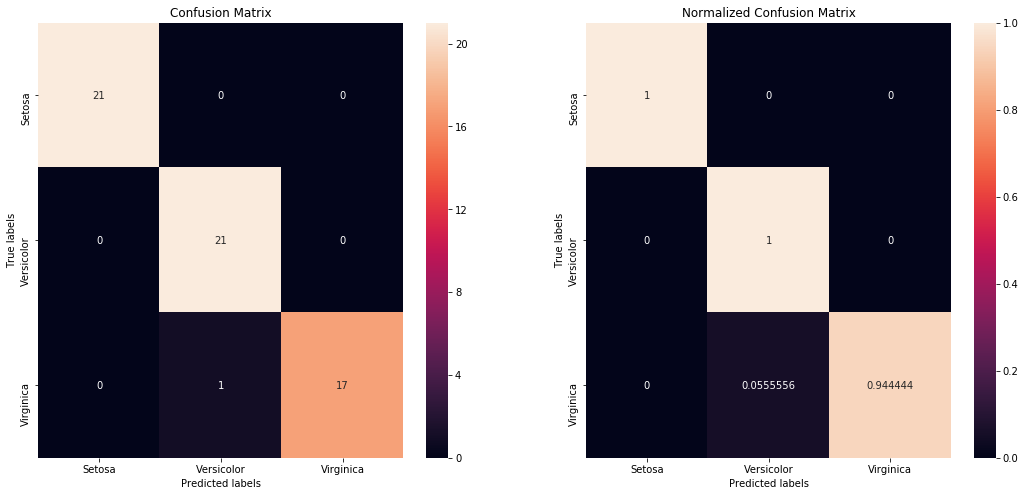

In [85]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
classes = ['Setosa', 'Versicolor', 'Virginica']
cm = confusion_matrix(y_test, Y_pred)
print('Confusion matrix')
print(cm) 

print("\n----")
   
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

print("\n----")

## visualize confusion matrices
#-------------------------------
import seaborn as sns
fig = plt.figure(figsize=(18, 8))

ax= fig.add_subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica']);
    
ax= fig.add_subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica']);

plt.show()

In [86]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(pcaIris, species, test_size=0.4, random_state=50, shuffle=True)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(90, 2) (60, 2) (90,) (60,)


In [87]:
## Use Standard Scaler

from sklearn.preprocessing import StandardScaler
trans2 = StandardScaler()
X_train2 = trans2.fit_transform(X_train2)
X_test2 = trans2.transform(X_test2)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(90, 2) (60, 2) (90,) (60,)


In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
X_train2 = pca.fit_transform(X_train2)
X_test2 = pca.transform(X_test2)

In [89]:
## Train KNN Model

from sklearn.neighbors import KNeighborsClassifier

# Create the knn model
k2 = 2
knn2 = KNeighborsClassifier(n_neighbors = k2)

# Fit on training data
knn2.fit(X_train2, y_train2)
Y_pred2 = knn2.predict(X_test2)

In [90]:
acc_knn2 = round(knn2.score(X_test2, y_test2) * 100, 2)
print("KNN Classifier's accuracy with K=", str(k2), "is:", str(acc_knn2))

KNN Classifier's accuracy with K= 2 is: 96.67


Confusion matrix
[[21  0  0]
 [ 0 20  1]
 [ 0  1 17]]

----
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95238095 0.04761905]
 [0.         0.05555556 0.94444444]]

----


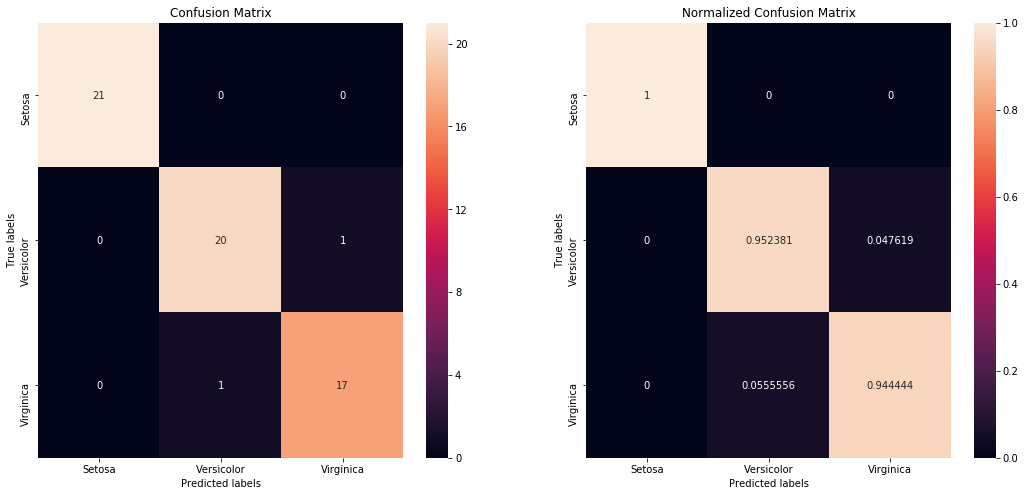

In [50]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
classes = ['Setosa', 'Versicolor', 'Virginica']
cm = confusion_matrix(y_test2, Y_pred2)
print('Confusion matrix')
print(cm) 

print("\n----")
   
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

print("\n----")

## visualize confusion matrices
#-------------------------------
import seaborn as sns
fig = plt.figure(figsize=(18, 8))

ax= fig.add_subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica']);
    
ax= fig.add_subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica']);

plt.show()

### Going off the same testing parameters that gave ~98% accuracy, the PCA model still got ~97% going from 4 components to 2, so overall still very accurate.